# Objective:

The objective of this project is to develop a robust credit risk assessment model that can accurately predict the likelihood of a customer defaulting on a loan, enabling financial institutions to make informed lending decisions and minimize potential losses.

# Problem Statement:

Financial institutions face significant challenges in assessing the creditworthiness of customers, particularly in today's complex and dynamic economic environment. The inability to accurately predict credit risk can lead to substantial losses, damage to reputation, and regulatory penalties. Therefore, there is a pressing need for a reliable and efficient credit risk assessment model that can help financial institutions identify high-risk customers and take proactive measures to mitigate potential defaults.

# Dataset:

The dataset used for this project is the "credit_risk" dataset, which contains information about customers' creditworthiness. The dataset includes variables such as:

- Demographic information (age, income, etc.)
- Credit history (number of late payments, credit utilization ratio, etc.)
- Financial information (debt-to-income ratio, etc.)
- Target variable: SeriousDlqin2yrs (a binary variable indicating whether the customer has experienced serious delinquency in the past 2 years)

The dataset consists of approximately 150,000 observations, with a class imbalance between the default and non-default classes. The dataset is suitable for developing and testing credit risk assessment models.

### Dataset Characteristics:

- Number of observations: 150,000
- Number of features: 11
- Target variable: SeriousDlqin2yrs (binary)
- Class imbalance: Yes (default class is minority class)


In [3]:
# Install Libraries
import yfinance as yf
import pandas as pd
import numpy as np

In [4]:
# load data
df=pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [8]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
# prompt: nan values column

# Count NaN values in each column
nan_counts = df.isnull().sum()

# Print the counts
print("Number of NaN values per column:")
print(nan_counts)

# Optionally, you can print columns with at least one NaN value
print("\nColumns with NaN values:")
print(nan_counts[nan_counts > 0])

Number of NaN values per column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Columns with NaN values:
person_emp_length     895
loan_int_rate        3116
dtype: int64


In [10]:
# Handling missing values in 'person_emp_length' and 'loan_int_rate'
# For 'person_emp_length', we can fill missing values with the mean as it's a numerical column
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)

# For 'loan_int_rate', we can also fill missing values with the mean as it's a numerical column
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

# Verify that missing values have been handled
print("\nNumber of NaN values per column after handling:")
print(df.isnull().sum())


Number of NaN values per column after handling:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


<ipython-input-10-b0b032f1b30d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
<ipython-input-10-b0b032f1b30d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [12]:
# Select columns that are of type int or float
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create a new dataframe with only these columns
df_numeric = df[numeric_cols]

# Print the info of the new dataframe to verify
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_emp_length           32581 non-null  float64
 3   loan_amnt                   32581 non-null  int64  
 4   loan_int_rate               32581 non-null  float64
 5   loan_status                 32581 non-null  int64  
 6   loan_percent_income         32581 non-null  float64
 7   cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.0 MB


In [13]:
 #catagorical columns

categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:")
categorical_cols

Categorical columns:


Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

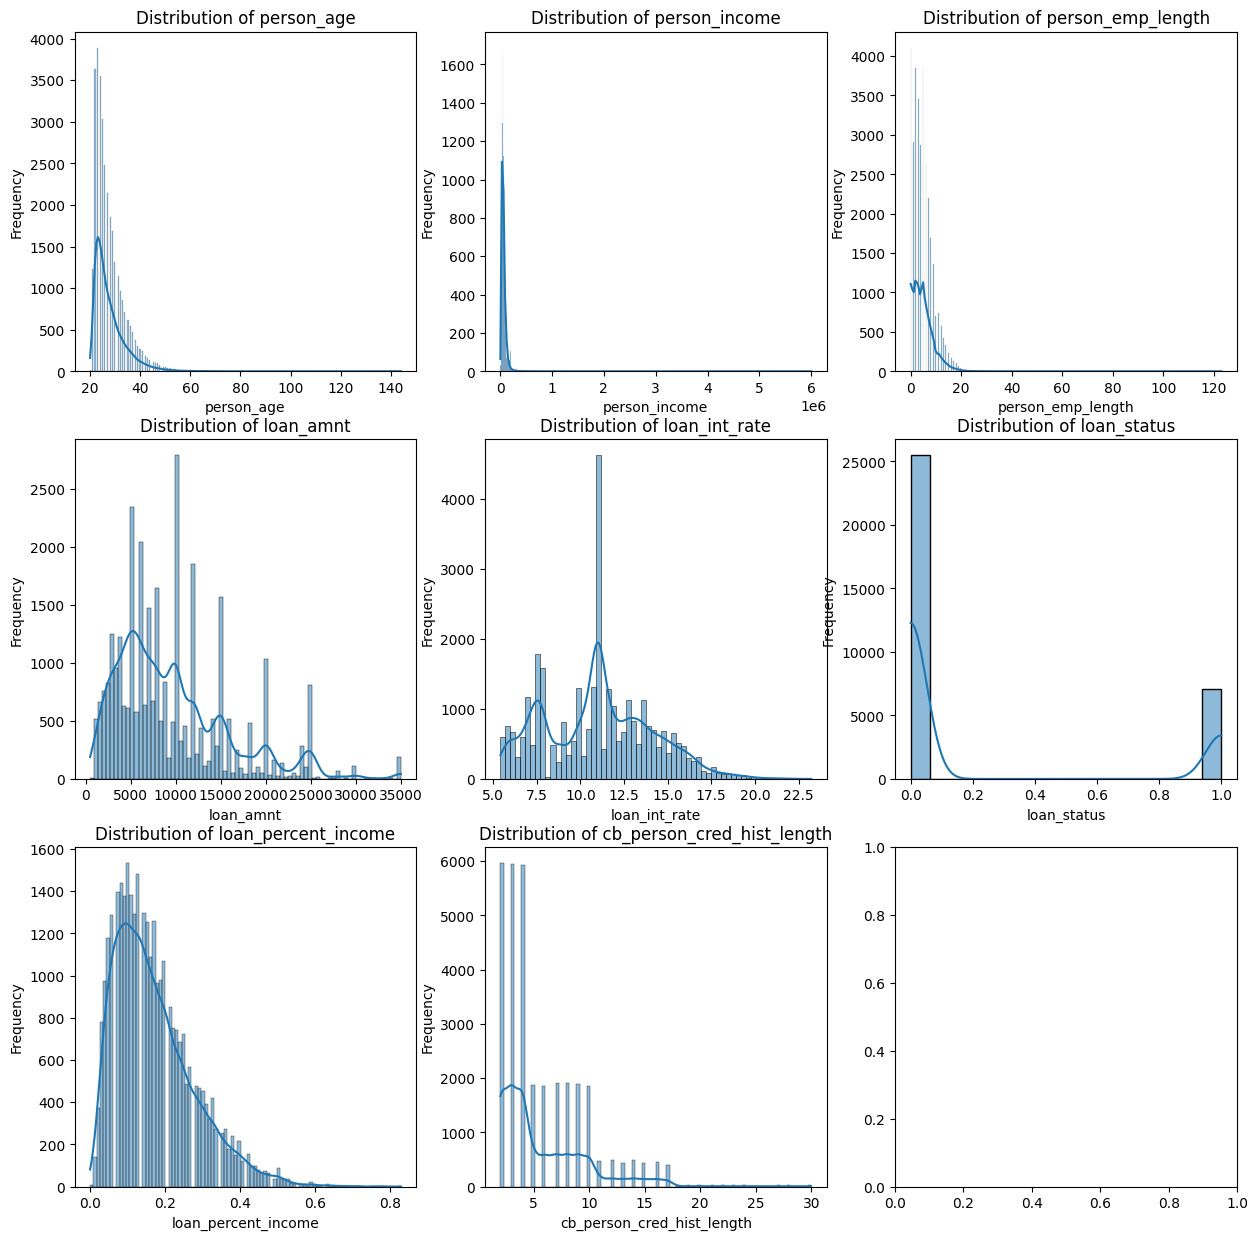

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of rows and columns for the subplots
n_cols = 3  # You can adjust this number
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot the distribution for each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


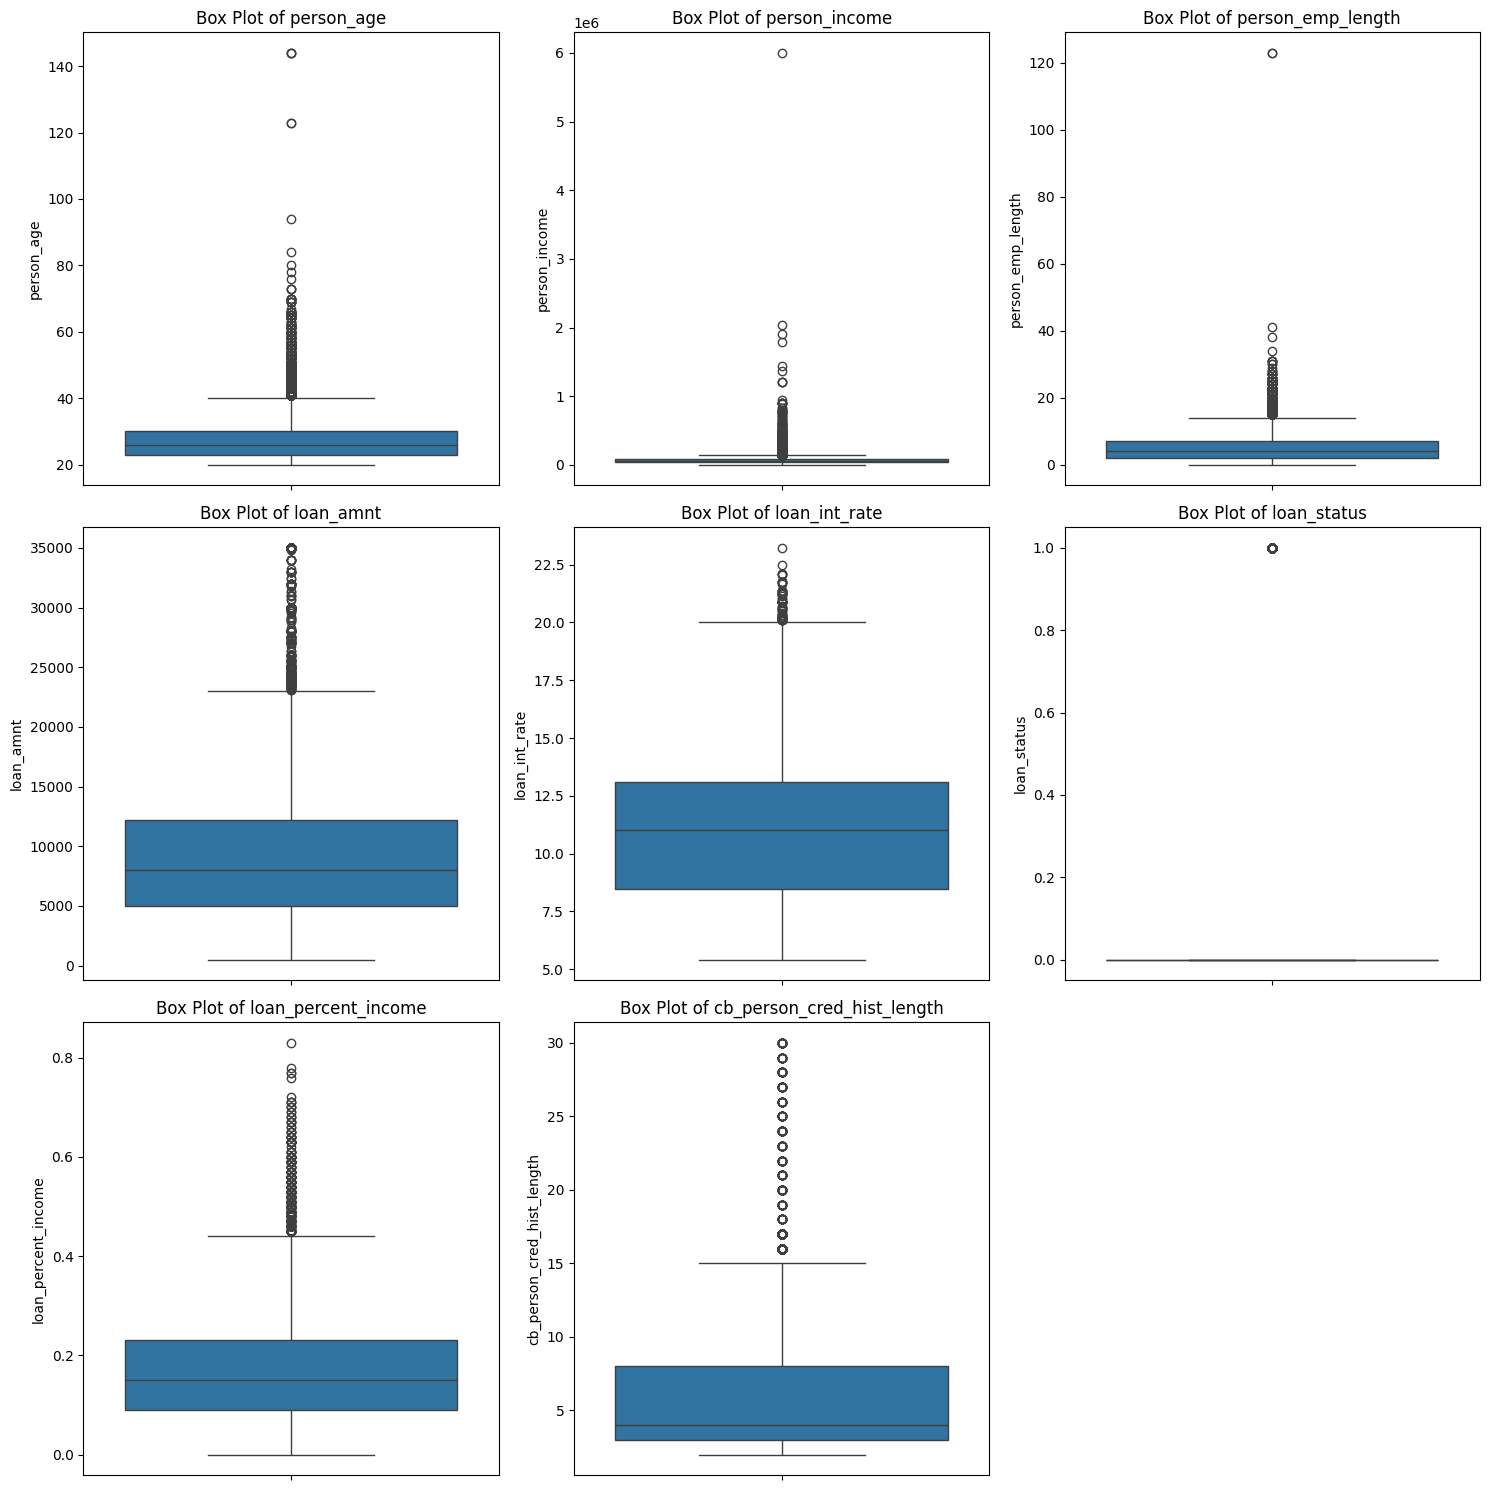

In [29]:
# Determine the number of rows and columns for the subplots
n_cols = 3  # You can adjust this number
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create box plots for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Removing outliers for column: person_age
Removed 1494 rows from column person_age
Removing outliers for column: person_income
Removed 1476 rows from column person_income
Removing outliers for column: person_emp_length
Removed 614 rows from column person_emp_length
Removing outliers for column: loan_amnt
Removed 1228 rows from column loan_amnt
Removing outliers for column: loan_int_rate
Removed 32 rows from column loan_int_rate
Removing outliers for column: loan_status
Removed 6013 rows from column loan_status
Removing outliers for column: loan_percent_income
Removed 276 rows from column loan_percent_income
Removing outliers for column: cb_person_cred_hist_length
Removed 695 rows from column cb_person_cred_hist_length

Shape of dataframe before outlier removal: (32581, 12)
Shape of dataframe after outlier removal: (20753, 12)


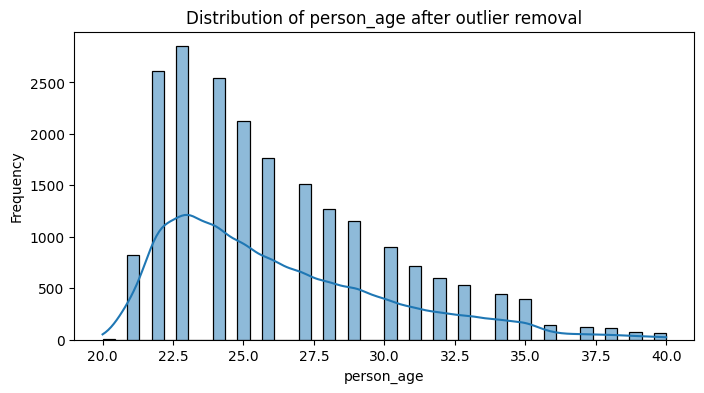

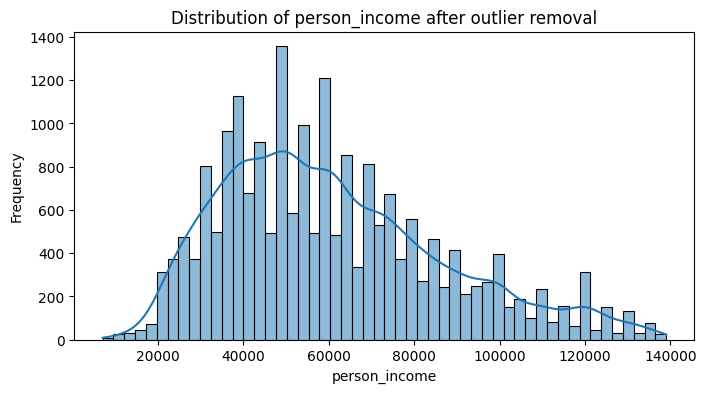

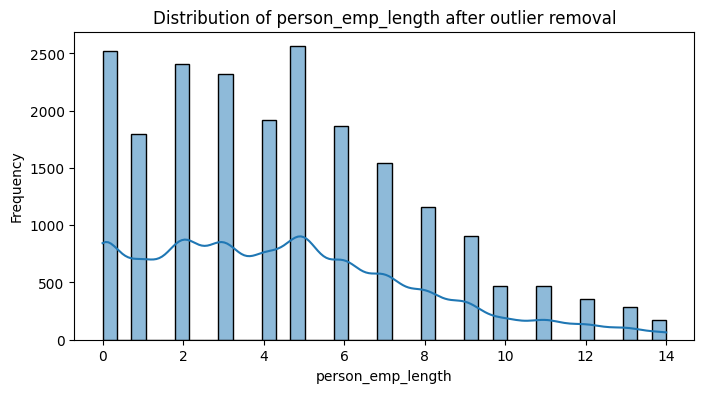

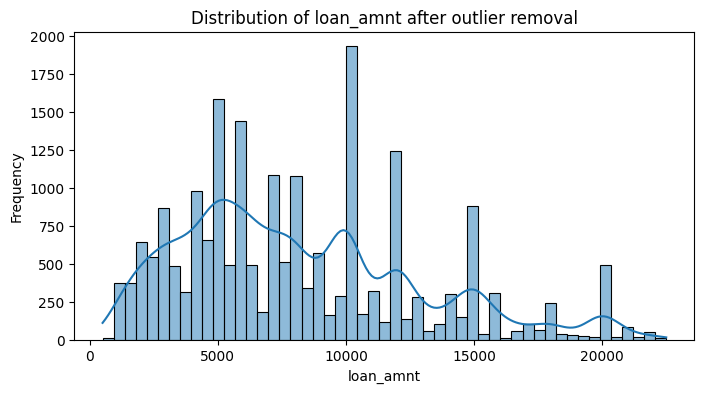

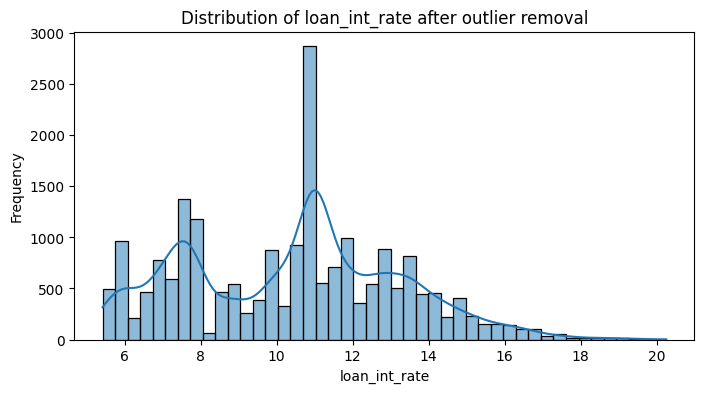

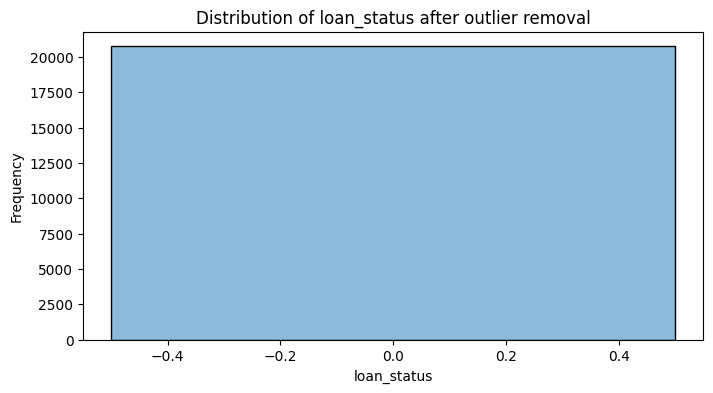

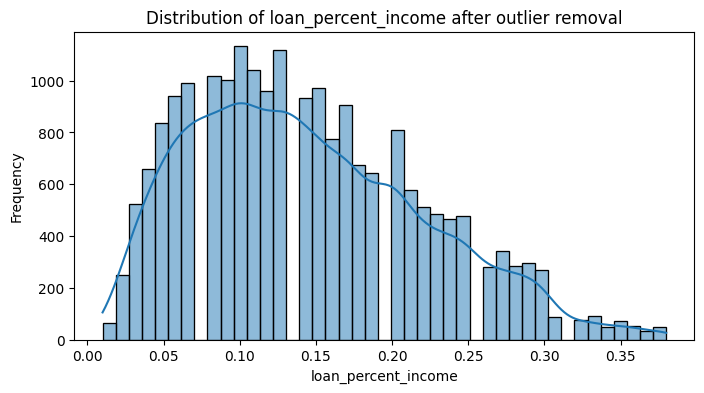

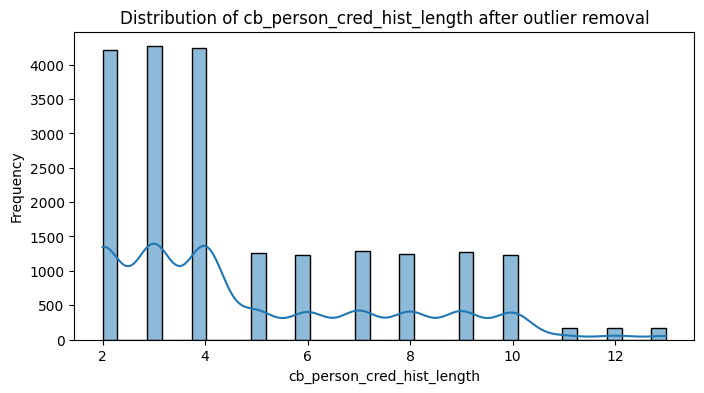

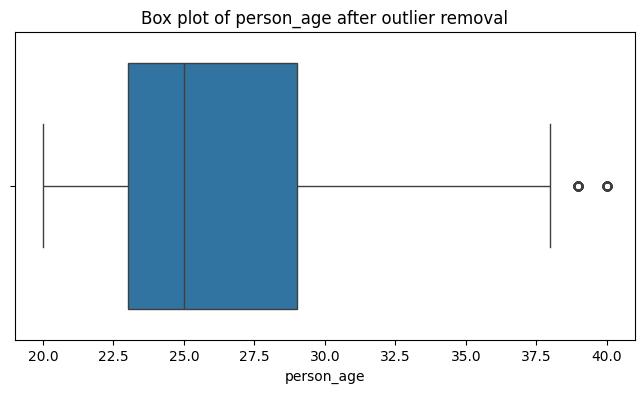

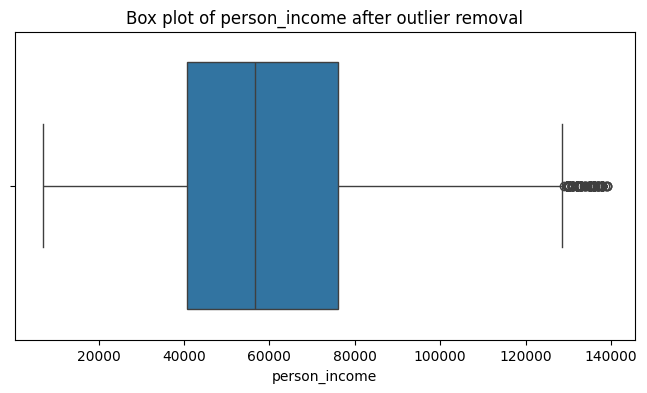

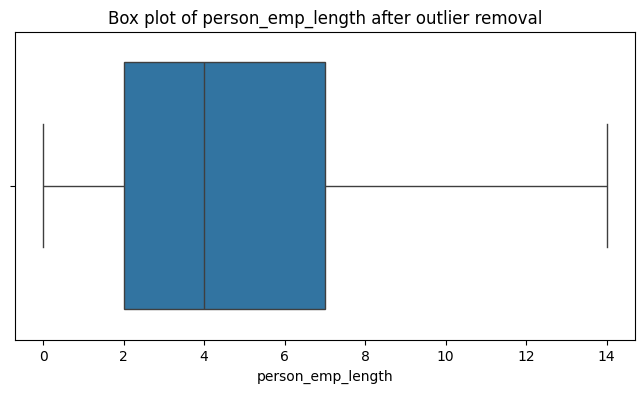

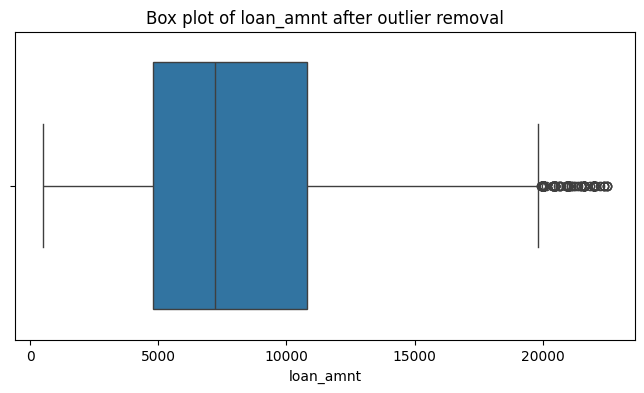

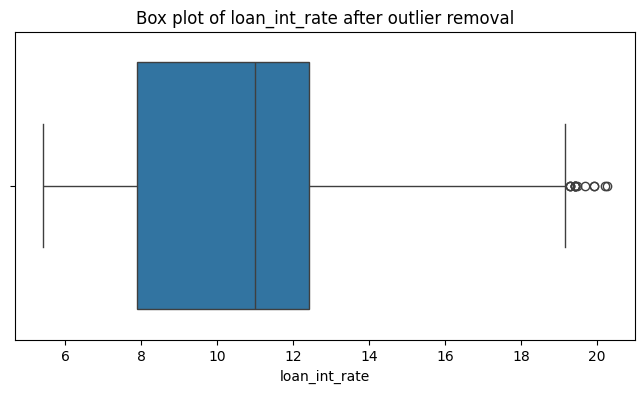

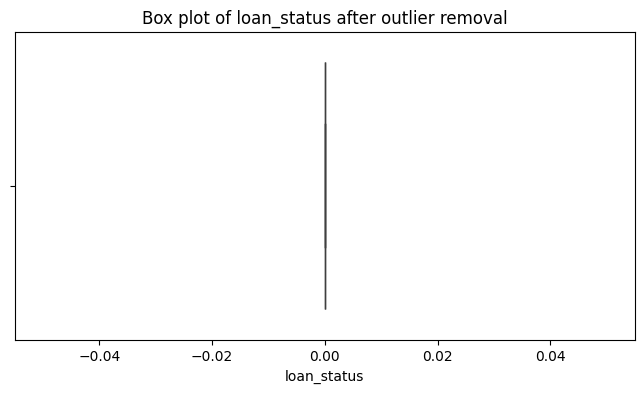

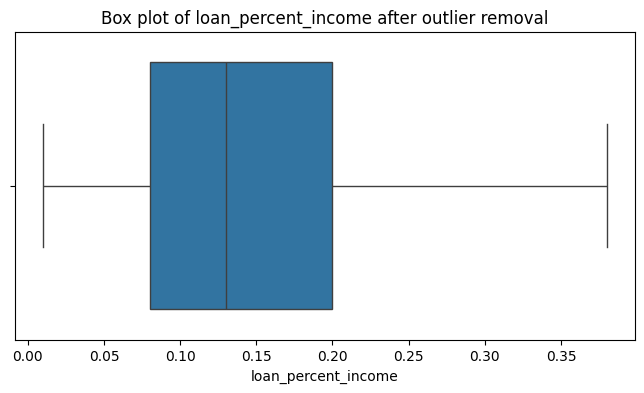

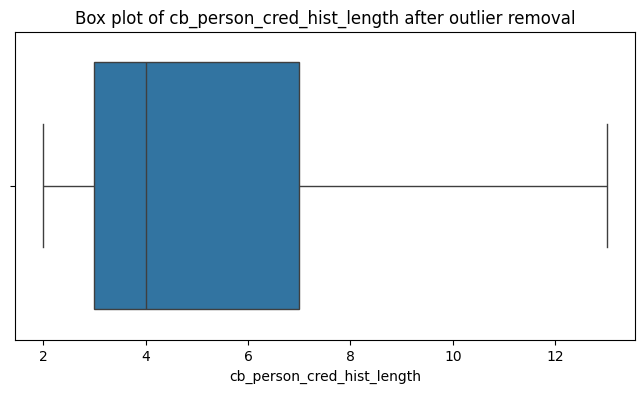

In [16]:

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Identify numerical columns (excluding the target variable if it's numerical and not an outlier)
# Assuming 'SeriousDlqin2yrs' is the target and it's not a continuous variable where outlier removal is appropriate
# If your target is numerical and needs outlier handling, include it here
numeric_cols_for_outlier = df_numeric.columns.tolist()
# Example: if 'SeriousDlqin2yrs' is in df_numeric and you don't want to remove outliers from it
# if 'SeriousDlqin2yrs' in numeric_cols_for_outlier:
#     numeric_cols_for_outlier.remove('SeriousDlqin2yrs')


df_cleaned = df.copy() # Start with a copy of the original dataframe

# Apply outlier removal for each numerical column
for col in numeric_cols_for_outlier:
    print(f"Removing outliers for column: {col}")
    initial_rows = df_cleaned.shape[0]
    df_cleaned = remove_outliers_iqr(df_cleaned, col)
    rows_removed = initial_rows - df_cleaned.shape[0]
    print(f"Removed {rows_removed} rows from column {col}")

print("\nShape of dataframe before outlier removal:", df.shape)
print("Shape of dataframe after outlier removal:", df_cleaned.shape)

# Visualize the distribution of numeric columns after outlier removal
df_numeric_cleaned = df_cleaned.select_dtypes(include=[np.number]).columns

for col in df_numeric_cleaned:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col} after outlier removal')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Create box plots for numerical columns after outlier removal
for col in df_numeric_cleaned:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box plot of {col} after outlier removal')
    plt.xlabel(col)
    plt.show()


In [17]:
# prompt: # Identify categorical columns

categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:")
categorical_cols


Categorical columns:


Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
# Apply Label Encoding to all categorical columns
le = LabelEncoder()
for col in categorical_cols:
    # Handle potential NaN values in categorical columns if any exist
    if df[col].isnull().any():
         df[col] = df[col].fillna('Missing') # Fill NaN with a placeholder or another strategy
    df[col] = le.fit_transform(df[col])

In [21]:
# Import necessary modules for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the features and target variable
# Ensure you drop all columns that should not be features (e.g., the target variable)
# Based on the previous cells, the target is 'loan_status'
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data types in X_train to confirm all columns are numeric
print("Data types in X_train before fitting:")
print(X_train.dtypes)

# Train a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Now fit the model
rf_model.fit(X_train, y_train)

Data types in X_train before fitting:
person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
dtype: object


RandomForestClassifier(random_state=42)

In [22]:
# Evaluate the model
# Corrected: predict method only takes X, not y
y_pred = rf_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.927880926806813
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.96      0.71      0.81      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.88      6517
weighted avg       0.93      0.93      0.92      6517

Confusion Matrix:
[[5025   47]
 [ 423 1022]]


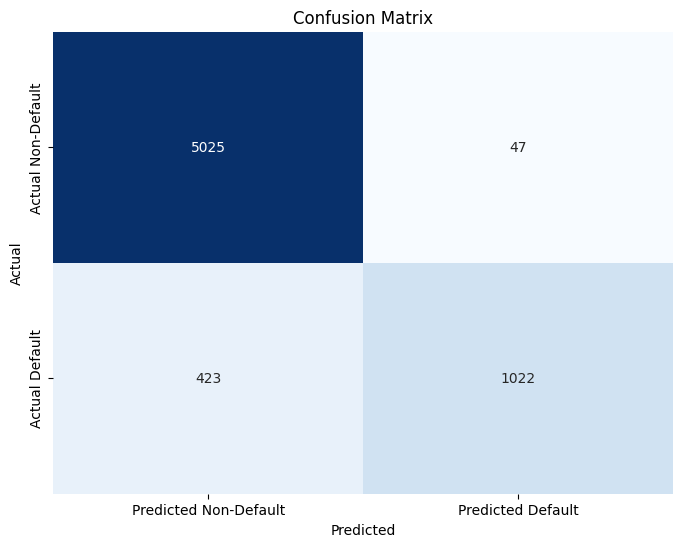

In [25]:


# Visualize the results (e.g., confusion matrix)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Default', 'Predicted Default'],
            yticklabels=['Actual Non-Default', 'Actual Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Credit Risk Assessment Model Report

This report details the process of developing a credit risk assessment model using the "credit_risk" dataset. The objective is to predict the likelihood of a customer defaulting on a loan.

### 2. Report:

#### Dataset Preprocessing Steps:

The initial dataset analysis revealed the presence of missing values, primarily in the 'person_emp_length' and 'loan_int_rate' columns. Since these are numerical features, a mean imputation strategy was employed to fill the missing values. This approach preserves the overall distribution of the data for these features.

Outliers were identified using box plots for numerical columns. To handle these outliers, the Interquartile Range (IQR) method was applied. Data points falling below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR` were removed. This step aimed to reduce the influence of extreme values on the model's performance and improve the robustness of the analysis.

Categorical columns were identified ('person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'). Label Encoding was used to convert these categorical features into numerical representations. This is a necessary step as most machine learning algorithms require numerical input. A placeholder 'Missing' was used to handle any potential NaN values within categorical columns before encoding.

The dataset was then split into features (X) and the target variable (y), which is 'loan_status'. A standard 80/20 split was used to create training and testing sets, ensuring that the model is evaluated on unseen data.

#### Model Selection and Rationale:

A Random Forest Classifier was chosen for this credit risk assessment task. The rationale for selecting Random Forest is based on several factors:

*   **Ensemble Method:** Random Forests are ensemble learning methods that combine multiple decision trees. This helps to reduce overfitting and improve the model's generalization ability.
*   **Handles Non-linearity:** Random Forests can effectively capture complex, non-linear relationships between features and the target variable. Credit risk is often influenced by intricate interactions between various factors, making Random Forest a suitable choice.
*   **Feature Importance:** Random Forests provide a measure of feature importance, which can be valuable for understanding which factors are most influential in predicting credit risk.
*   **Robust to Outliers and Missing Values:** While preprocessing steps were performed, Random Forests are generally less sensitive to outliers and missing values compared to some other algorithms.
*   **Good Performance:** Random Forests are known for their strong predictive performance on a wide range of classification tasks, including credit risk assessment.

The model was trained with 100 estimators and a fixed random state for reproducibility.

#### Challenges Faced and Solutions:

*   **Missing Data:** The presence of missing values in 'person_emp_length' and 'loan_int_rate' was a challenge. The solution implemented was mean imputation, which is a common and relatively simple technique for handling missing numerical data.
*   **Outliers:** Identifying and dealing with outliers in numerical features was important to prevent them from unduly influencing the model. The IQR method was chosen as a robust statistical technique for outlier removal. While removing outliers can sometimes lead to loss of information, it was deemed necessary in this case to potentially improve model performance.
*   **Categorical Feature Encoding:** Converting categorical features into a format suitable for machine learning models was necessary. Label Encoding was used as a straightforward method for this transformation. Care was taken to handle potential missing values in categorical columns before encoding.
*   **Model Evaluation:** Evaluating the model's performance required using appropriate metrics for a classification task. Accuracy, Classification Report (including precision, recall, f1-score), and Confusion Matrix were used to gain a comprehensive understanding of the model's strengths and weaknesses. The class imbalance, although not explicitly addressed with techniques like oversampling or undersampling in the provided code, is a known challenge in credit risk datasets and would ideally require specific handling to avoid bias towards the majority class.

